In [1]:
import pandas as pd
import numpy as np

C:\Users\Vishal\AppData\Local\Temp\ipykernel_1280\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Outcome', ylabel='count'>

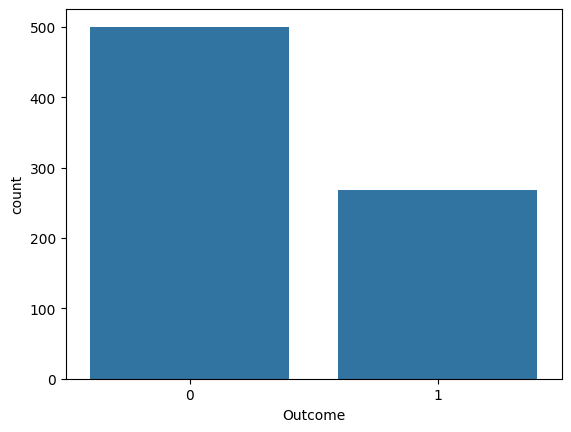

In [7]:
sns.countplot(x = data["Outcome"])

<Axes: xlabel='Pregnancies'>

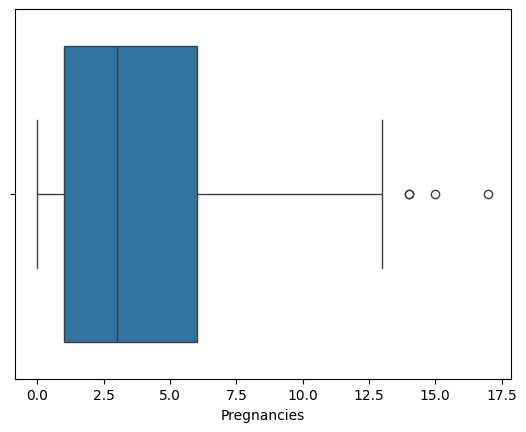

In [8]:
sns.boxplot(data = data, x = 'Pregnancies')

<Axes: xlabel='Glucose'>

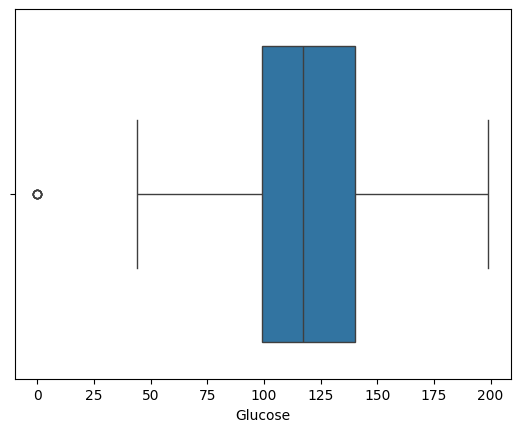

In [9]:
sns.boxplot(data = data, x = 'Glucose')

<Axes: xlabel='BloodPressure'>

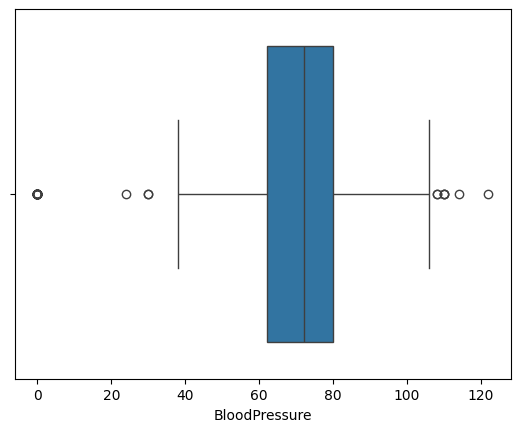

In [10]:
sns.boxplot(data = data, x = 'BloodPressure')

<Axes: xlabel='SkinThickness'>

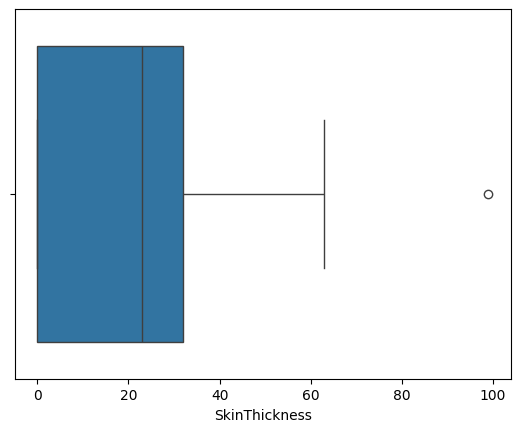

In [11]:
sns.boxplot(data = data, x = 'SkinThickness')

In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
X = data.iloc[:,0:8]
X.shape

(768, 8)

In [14]:
Y = data.iloc[:, -1]
Y.shape

(768,)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [16]:
print("The shapes of the test and train dataset are:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

The shapes of the test and train dataset are:
(614, 8) (154, 8) (614,) (154,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [18]:
model.score(X_test, y_test)

0.7012987012987013

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

In [21]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[88, 11],
       [35, 20]], dtype=int64)

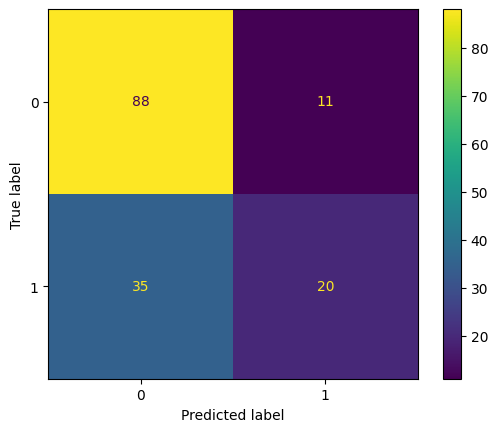

In [22]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [23]:
print("Accuracy: ")
accuracy_score(y_test, y_pred)

Accuracy: 


0.7012987012987013

In [24]:
print("Precision: ")
precision_score(y_test, y_pred)

Precision: 


0.6451612903225806

In [25]:
print("Recall: ")
recall_score(y_test, y_pred)

Recall: 


0.36363636363636365

In [26]:
print("Error: ")
1-accuracy_score(y_test, y_pred)

Error: 


0.2987012987012987

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79        99
           1       0.65      0.36      0.47        55

    accuracy                           0.70       154
   macro avg       0.68      0.63      0.63       154
weighted avg       0.69      0.70      0.68       154

